In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# 1. Carga el dataset
df = pd.read_csv('precios_casas.csv')
print(df.head())
print(df.info())

   Id  Area  Habitaciones  Baños  Garage  Antiguedad Ubicacion         Precio
0   1   152             3      1       1          32  Suburbio  244286.869346
1   2   398             1      3       1          48    Centro  535132.830708
2   3   320             5      3       1          20    Centro  487556.118594
3   4   156             4      3       1           8    Centro  277399.743958
4   5   121             3      3       0           5     Rural  205112.958006
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1000 non-null   int64  
 1   Area          1000 non-null   int64  
 2   Habitaciones  1000 non-null   int64  
 3   Baños         1000 non-null   int64  
 4   Garage        1000 non-null   int64  
 5   Antiguedad    1000 non-null   int64  
 6   Ubicacion     1000 non-null   object 
 7   Precio        1000 non-null   float

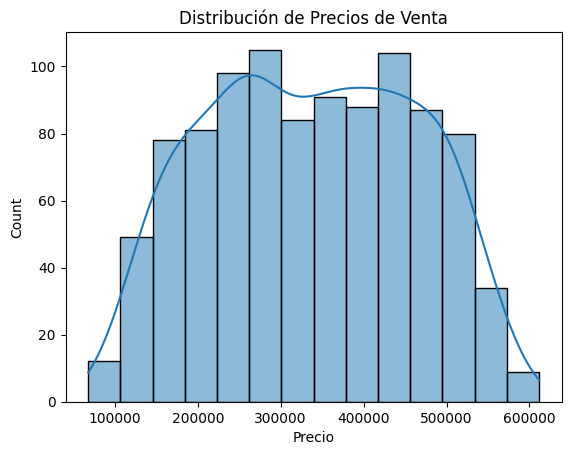

In [4]:
# 2. Análisis exploratorio
# Visualiza la distribución del precio de venta
sns.histplot(df['Precio'], kde=True)
plt.title('Distribución de Precios de Venta')
plt.show()

In [16]:
# Selecciona solo columnas numéricas
corr_matrix = df.select_dtypes(include=['number']).corr()

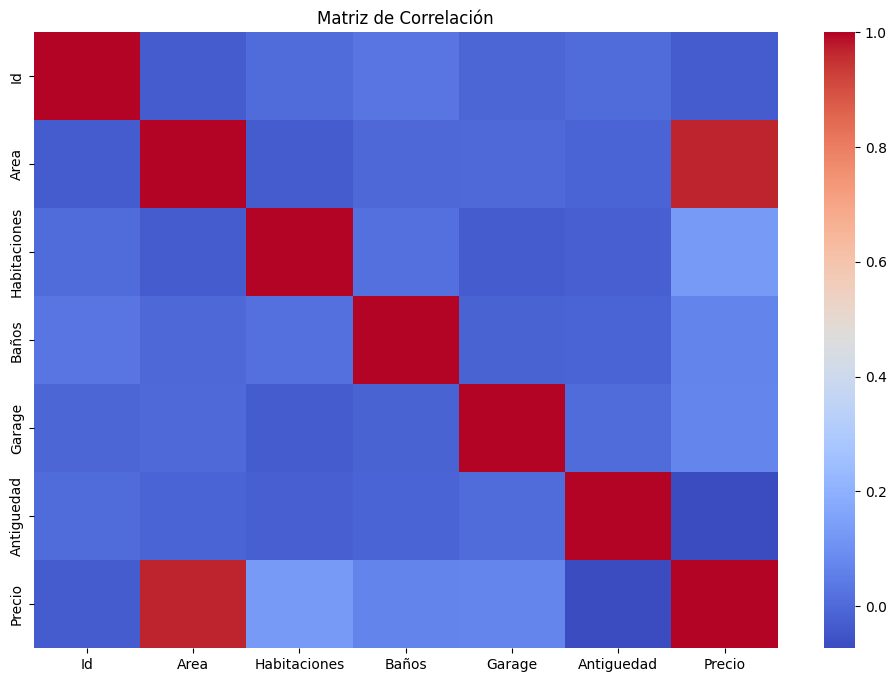

In [17]:
# Visualiza correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación')
plt.show()

In [6]:
# 3. Preparación de datos
# Separa características y variable objetivo
X = df.drop(columns=['Id', 'Precio'])
y = df['Precio']

In [7]:
# Identifica características numéricas y categóricas
num_features = X.select_dtypes(include=['number']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [8]:
# Pipeline para características numéricas
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [9]:
# Pipeline para características categóricas
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [10]:
# Combina pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [11]:
# 4. División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 5. Entrenamiento y evaluación de modelos
def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', modelo)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
    print(f'R²: {r2_score(y_test, y_pred):.2f}')
    return pipeline

In [13]:
# Regresión Lineal
print('Regresión Lineal:')
modelo_lr = LinearRegression()
pipeline_lr = evaluar_modelo(modelo_lr, X_train, y_train, X_test, y_test)

Regresión Lineal:
RMSE: 19560.40
MAE: 15373.83
R²: 0.98


In [14]:
# Árbol de Decisión
print('\nÁrbol de Decisión:')
modelo_dt = DecisionTreeRegressor(random_state=42)
pipeline_dt = evaluar_modelo(modelo_dt, X_train, y_train, X_test, y_test)


Árbol de Decisión:
RMSE: 31365.65
MAE: 25148.26
R²: 0.94


In [15]:
# XGBoost
print('\nXGBoost:')
modelo_xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
pipeline_xgb = evaluar_modelo(modelo_xgb, X_train, y_train, X_test, y_test)


XGBoost:
RMSE: 23705.40
MAE: 18421.80
R²: 0.97
